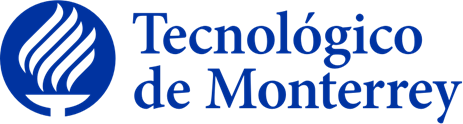

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Visión computacional para imágenes y video - TC4033.10**
### Prof: Dr. Gilberto Ochoa Ruiz

## **3.2 Google Colab - Algoritmos de mejoramiento de imágenes en el dominio espacial**
### Enero 28 de 2024

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?
2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.
3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

## **Nombres y matrículas de los integrantes del Equipo 24:**

* Victor Alejandro Regueira Romero | A01794404
* Fernando Maytorena Espinosa de los Monteros | A01110946
* Edgar Rodolfo Escobar Gómez | A01793900
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

Nota: Nuestro código de la actividad se encuentra al final, después del código de ejemplo suministrado por el profesor.

# 4. Image Convolution

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [ ]:
import cv2

## Nuestras Funciones Auxiliares <a class="anchor" id="funciones" ></a>

In [ ]:

import urllib.request

#From: https://stackoverflow.com/questions/72456644/what-is-the-meaning-of-flag-in-cv2-imdecode:
#1 specifies cv2.IMREAD_COLOR : Reads image in BGR color format and removes the alpha channel .It is the default value of flag.
#0 specifies cv2.IMREAD_GRAYSCALE : Reads image in grayscale.
#-1 specifies cv2.IMREAD_UNCHANGED : Reads image without change, preserves the alpha channel
IMREAD_COLOR = 1
IMREAD_GRAYSCALE = 0
IMREAD_UNCHANGED = -1
def load_imgURL_CV2(imgURL, flags=-1):
  req = urllib.request.urlopen(imgURL)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  return cv2.imdecode(arr, flags)

def load_imgURL_PIL(imgURL):
  urllib.request.urlretrieve(imgURL, 'tempImg')
  return Image.open('tempImg')

Código para montar el drive de la máquina temporal donde corre Google Colab.

También creamos el directorio `data` ya que es usado para algunas pruebas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

datadir = './data'

if not os.path.exists(datadir):
  os.mkdir(datadir)
  print("%s ha sido creado!" % datadir)
else:
  print("Directorio %s ya existe" % datadir)


Mounted at /content/drive
./data ha sido creado!


Imágenes a usar

In [ ]:
IMAGE = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image.jpg'
IMAGEN1 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/chessboard.jpg'
IMAGENJPG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/board.jpg'
IMAGEN_GRIS = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/blox.jpg'


## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="data/convolution.png" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__.

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [ ]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [ ]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [ ]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

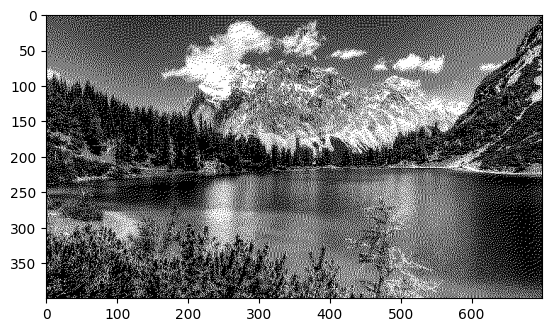

In [ ]:
#image = Image.open('data/image.jpg')
image = load_imgURL_PIL(IMAGE)
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [ ]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

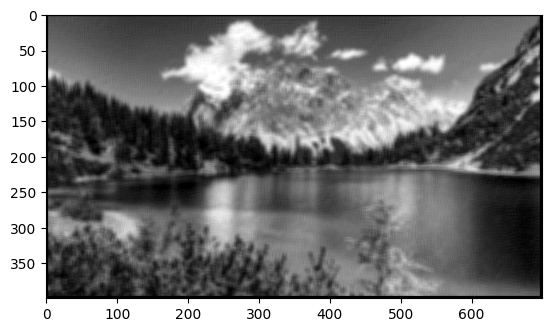

In [ ]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [ ]:
from PIL import Image

#img = Image.open('data/image.jpg')
img = load_imgURL_PIL(IMAGE)
img.thumbnail((256,256), Image.LANCZOS) # Resize to half to reduce the size of this notebook.

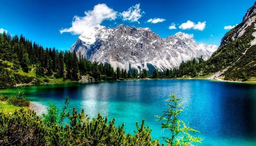

In [ ]:
img

In [ ]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [ ]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [ ]:
input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

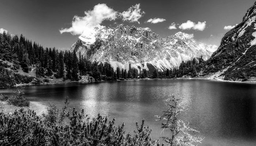

In [ ]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [ ]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [ ]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[ 0.2378,  0.2928,  0.2905,  ...,  0.3987,  0.3963,  0.2704],
         [ 0.1494,  0.2125,  0.2120,  ...,  0.2907,  0.2280,  0.0531],
         [ 0.1576,  0.2224,  0.2162,  ...,  0.2738,  0.1389,  0.0529],
         ...,
         [-0.0054,  0.0330,  0.0946,  ...,  0.2472,  0.2378,  0.1539],
         [-0.0051,  0.1281,  0.0893,  ...,  0.2515,  0.2447,  0.1594],
         [ 0.0521,  0.0574,  0.0055,  ...,  0.0819,  0.0854,  0.0098]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [ ]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [ ]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [ ]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [ ]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

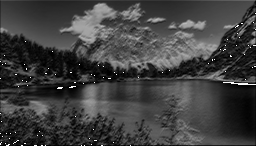

In [ ]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

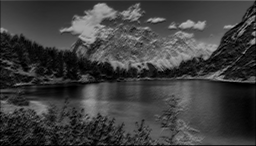

In [ ]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [ ]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

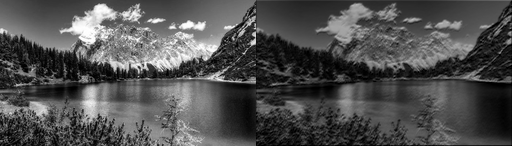

In [ ]:
display(input, output)

### Identity

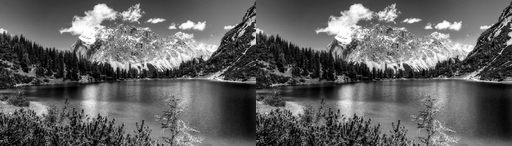

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


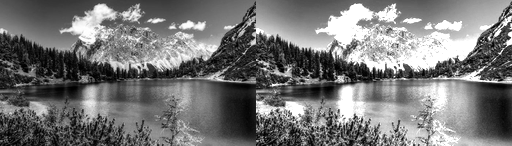

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


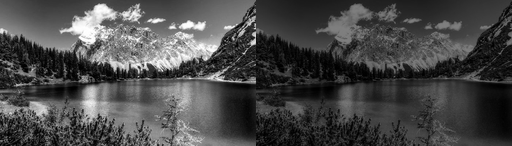

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


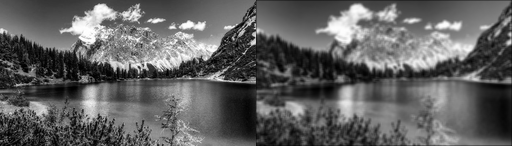

In [ ]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


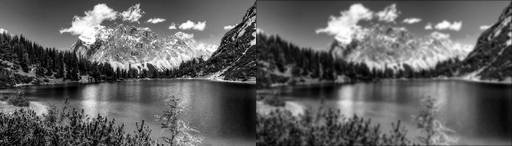

In [ ]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


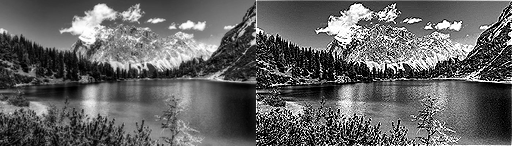

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


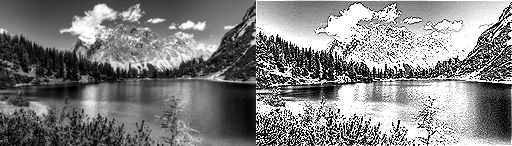

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


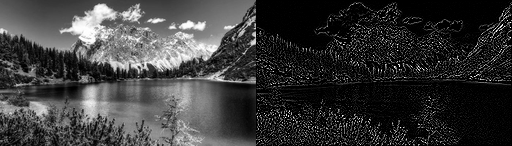

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

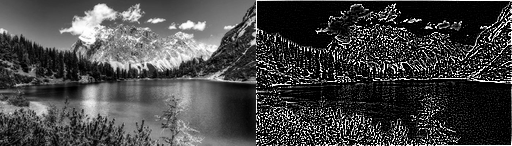

In [ ]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

In [ ]:
# TODO: Challenge, hard image with hard transformations

#Actividad

## 1. Detectores de línea.

**1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?**


El operador Prewitt es un filtro utilizado para calcular aproximaciones de las derivadas parciales de una imagen en las direcciones horizontal y vertical. Estas aproximaciones son utilizadas para detectar bordes y cambios de intensidad en la imagen. El operador Prewitt utiliza dos máscaras, una para la derivada en la dirección horizontal y otra para la derivada en la dirección vertical (González, 2018).

Cuando se produce un cambio brusco en las intensidades de los píxeles, la máscara detecta un borde. El borde se define como el cambio en las intensidades de los píxeles y puede calcularse utilizando la diferenciación. El operador de Prewitt es una derivada de primer orden. En la representación gráfica del resultado de la máscara de Prewitt, el borde está representado por los máximos o mínimos locales (Martínez, 2022).

La detección de bordes de Sobel, hace uso de un filtro que enfatiza el centro del mismo y reduce el ruido a la vez que proporciona una respuesta de distinción y de borde. La detección de bordes de Sobel se obtiene cuando el peso en los píxeles centrales, para ambas plantillas de Prewitt, se duplica. La diferencia práctica entre el operador de Sobel y el de Prewitt es que en el primero, los coeficientes de las máscaras son ajustables según el requerimiento siempre que sigan todas las propiedades de las máscaras derivadas (Martínez, 2022).

La principal diferencia entre las máscaras Sobel y Prewitt radica en los pesos asignados a los píxeles cercanos al centro de la máscara, lo que afecta la sensibilidad del operador a ciertos tipos de bordes y detalles en la imagen (Martínez, 2022).

La detección de bordes Laplaciana es diferentes de los detectores de bordes anteriores debido a que sólo utiliza un filtro llamado núcleo. Este método ejecuta derivadas de segundo orden en una sola operación, lo que la hace muy sensible al ruido. Se recomienda suavizar la imagen con un filtro gaussiano para evitar la sensibilidad al ruido (Universidad de Sevilla, s.f).

La diferencia entre el Laplaciano y los operadores de Prewitt y Sobel, es que el Laplaciano no elimina las aristas en ninguna dirección en particular, sino que elimina las aristas entre los bordes hacia adentro y los bordes hacia afuera (Martínez, 2022).

En términos de complejidad computacional, los algoritmos Prewitt, Sobel y Laplaciano son bastante similares, ya que todos ellos implican operaciones de convolución sobre la imagen de entrada. En términos generales, la complejidad de estos algoritmos es proporcional al tamaño de la imagen y al tamaño de la máscara utilizada. Sin embargo, se puede decir el Laplaciano involucra sólo una serie de operaciones matemáticas comparado con las dos que requieren los métodos de Prewitt y de Sobel para la detección de bordes horizontales y verticales, por lo que se puede decir que el Laplaciano puede ser menos complejo algorítmicamente en algunos casos.

Dependiendo de lo que se requiera, se puede decir que los operadores de Prewitt, debido a que sus máscaras son más suavizadas y son particularmente efectivos en la detección de bordes verticales y horizontales en imágenes en el caso de que se tenga una preferencia de los bordes a detectar (Universidad de Sevilla, s.f.).


**Definición de funciones**

A continuación se presentan algunos métodos que estaremos utilizando para esta actividad.

In [ ]:
#Obtiene la imagen en escala de grises
def get_image_in_gray_scale(path):
    img = load_imgURL_CV2(path, flags = -1)

    # Se utiliza la formula Y = 0.299R + 0.587G + 0.114B para obtener la escala de grises.
    #Esta fórmula es muy común para este tipo de conversiones
    return np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)


In [ ]:
#Función de convolución usando dos filtros
def convolve2d(image, horizontal_kernel, vertical_kernel):
  #Se obtienen las dimensiones de la imagen y los respectivos kernels
    image_height, image_width = image.shape
    horizontal_kernel_height, horizontal_kernel_width = horizontal_kernel.shape
    vertical_kernel_height, vertical_kernel_width = vertical_kernel.shape

    # Matriz donde se guardarán los resultados
    output = np.zeros_like(image)

    #Proceso de convolución, donde los kernels se van desplazando
    #y multiplicando la porción de la imagen que cubre cada kernel
    for x in range(image_height - horizontal_kernel_height +1):
        for y in range(image_width-vertical_kernel_height +1):
            output_x = np.sum(image[x:x + horizontal_kernel_height, y:y+horizontal_kernel_width] * horizontal_kernel)
            output_y = np.sum(image[x:x+vertical_kernel_height, y:y+vertical_kernel_width] * vertical_kernel)
            output[x+1, y+1] = np.sqrt(np.power(output_x, 2.0) + np.power(output_y, 2.0))

    return output

Filtro Prewitt

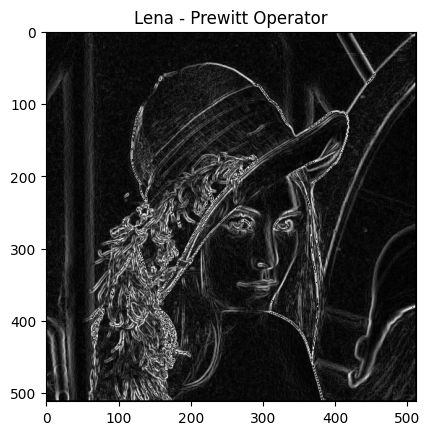

In [ ]:
#Imagen a utilizar
IMAGE = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/lena.jpg'

#Cargamos la imagen en escala de grises
gray_img = get_image_in_gray_scale(IMAGE)

# Definimos los operadores prewitt
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

#Aplicamos la convolución
prewitt = convolve2d(gray_img, horizontal, vertical)

#Mostramos la imagen
plt.figure()
plt.title('Lena - Prewitt Operator')
plt.imshow(prewitt, cmap='gray')
plt.show()


Filtro Sobel

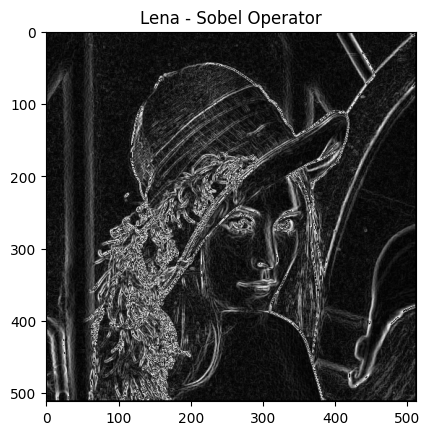

In [ ]:
# Definir los operadores sobel, uno para el eje horizontal y otro para el vertical
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#Aplicar la convolución
sobel = convolve2d(gray_img, horizontal, vertical)

#Mostrar la imagen
plt.figure()
plt.title('Lena - Sobel Operator')
plt.imshow(sobel, cmap='gray')
plt.show()

Filtro Laplaciano

Para el filtro laplaciano es necesario realizar un ajuste al método de convolución, ya que este algortimo solo usa un kernel.

In [ ]:
#Método de convolución con un solo kernel
def convolve1d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_height //2, kernel_height//2),(kernel_width // 2, kernel_width // 2)), mode='constant')

    for i in range(image_height):
      for j in range(image_width):
        output[i,j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

In [ ]:
def gaussian_blur(image):
    # Filtro gaussiano
    kernel = np.array([  [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],])/16

    #Aplicamos la convolución
    result = convolve1d(image, kernel)

    return result

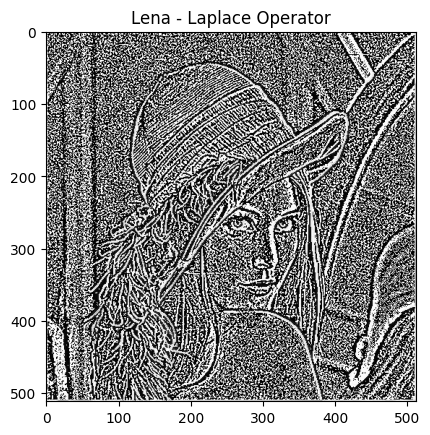

In [ ]:
#Operador laplaciano
laplace_operator = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

# Aplicamos un blur a la imagen
blur_image = gaussian_blur(gray_img)
#Aplicamos la convolución
laplace = convolve1d(blur_image, laplace_operator)

#Mostramos la imagen
plt.figure()
plt.title('Lena - Laplace Operator')
plt.imshow(laplace, cmap='gray')
plt.show()

## 2. Algoritmo de realce de líneas.

**2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.**

Para esta transformación, implementamos la técnica aprendida en clase:
1. Cargar la imagen original en gris
1. Suavizar la original. Lo haremos mediante un GaussianBlur de OpenCV.
1. Restar la suavizada de la original para obtener una máscara que será la utilizada para realzar los bordes.
1. Asignar un factor alfa por el cual se multiplicará la máscara para aumentar el efecto. Alfa = 1 adiciona la máscara original obtenida
1. Adicionar la máscara resultante (después de ser multiplicada por alfa) a la imagen original.

Con lo anterior se logra el efecto de intensificar líneas y bordes.

Usamos valores alfa de 1, 2 y 3. Obsérvese como en el resultado con alfa = 3 ya parece ser demasiado y la imagen empieza a mostrar signos definitivos de manipulación.

Esta transformación puede ser bastante útil para el realzamiento de líneas no sólo por factores estéticos, sino también para mejorar su detección por modelos que serán alimentados por las imágenes transformadas. Un ejemplo de ello es el tablero de ajedrez que también incluímos.

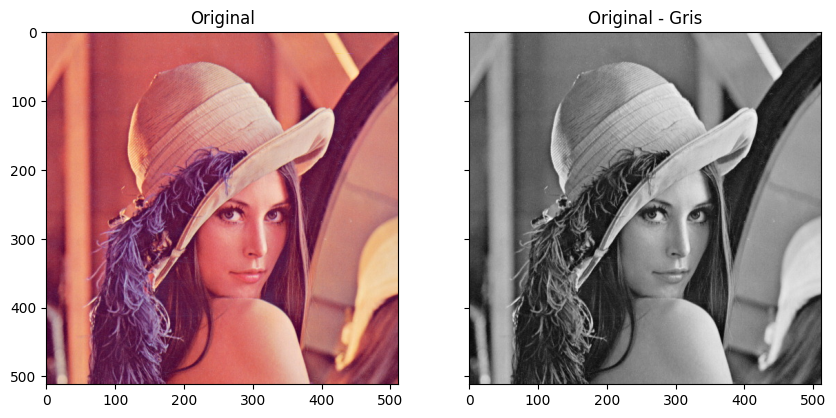

In [ ]:
#Imágenes a usar:
#IMAGEN1 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/chessboard.jpg'
IMAGEN1 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/lena.jpg'

#Cargamos la imagen usando CV2
imagen = load_imgURL_CV2(IMAGEN1, flags=-1)
#La convertimos al formato RGB que Matplotlib utiliza
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#Convertimos a gris
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

#Desplegamos original y gris
figsize = 10,5
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=100, sharex=True, sharey=True)
a = plt.subplot(1,2,1)
a.set_title("Original")
plt.imshow(imagen)
a = plt.subplot(1,2,2)
a.set_title("Original - Gris")
plt.imshow(imagen_gris, cmap='gray')
plt.show()



Text(0.5, 1.0, 'alpha = 3')

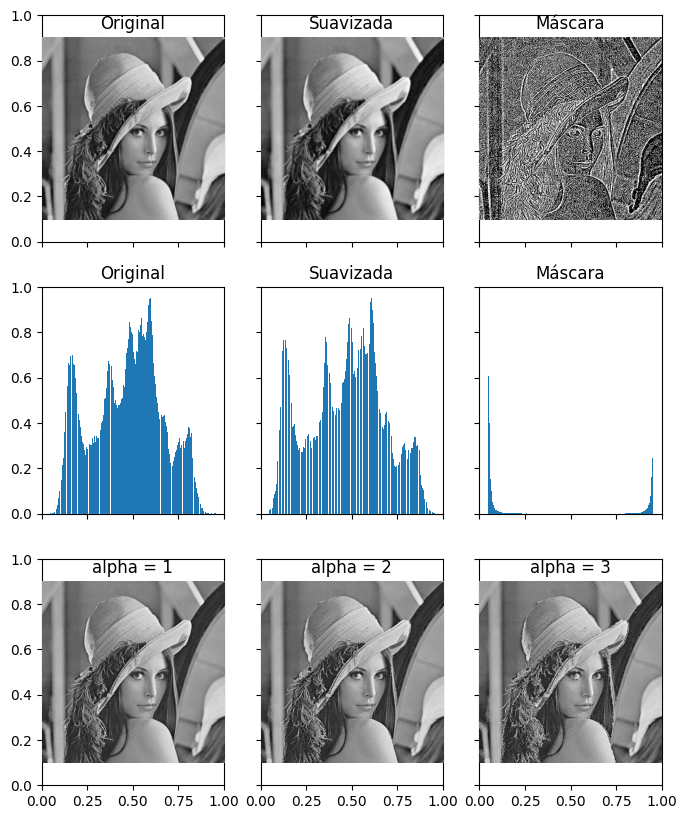

In [ ]:
def ajusta_resultado(i):
  #Ahora hay que reajustar el rango para que sea máximo de 255
  #Hay dos opciones, (usar sólo una):
  #Opción 1: si el pixel es > 255, asignar 255:
  #i[i>255] = 255
  #Opción 2: se puede normalizar, perdiendo un poco de brillo en la imagen en promedio:
  if np.max(i) > 255:
    i = (i / np.max(i)) * 255

  return i

#Suavizamos la imagen original
suavizada = cv2.GaussianBlur(imagen_gris, (5,5), 0)

#Restamos la suavizada de la original. Esta es nuestra máscara
mascara = imagen_gris - suavizada

alpha = 1
#Adicionamos la original a la máscara multiplicada por un factor
resultado = imagen_gris + (alpha*mascara).astype(np.uint8)
resultado = ajusta_resultado(resultado)

alpha2 = 2
resultado2 = imagen_gris + (alpha2*mascara).astype(np.uint8)
resultado2 = ajusta_resultado(resultado2)

alpha3 = 3
resultado3 = imagen_gris + (alpha3*mascara).astype(np.uint8)
resultado3 = ajusta_resultado(resultado3)

figsize = 8,10
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=figsize, dpi=100, sharex=True, sharey=True)

#Visualizamos las imágenes
# Imagen Original
a=fig.add_subplot(3,3,1)
a.axis('off')
plt.imshow(imagen_gris, cmap='gray')
a.set_title('Original')
# Imagen Suavizada
a=fig.add_subplot(3,3,2)
a.axis('off')
plt.imshow(suavizada, cmap='gray')
a.set_title('Suavizada')
# Máscara
a=fig.add_subplot(3,3,3)
a.axis('off')
plt.imshow(mascara, cmap='gray')
a.set_title('Máscara')


#Visualizamos los histogramas
# Original
a=fig.add_subplot(3,3,4)
a.axis('off')
imgplot = plt.hist(imagen_gris.ravel(),bins=255)
a.set_title('Original')
# Imagen Suavizada
a=fig.add_subplot(3,3,5)
a.axis('off')
imgplot = plt.hist(suavizada.ravel(),bins=255)
a.set_title('Suavizada')
# Máscara
a=fig.add_subplot(3,3,6)
a.axis('off')
imgplot = plt.hist(mascara.ravel(),bins=255)
a.set_title('Máscara')



# Resultados con diferentes alpha:
a=fig.add_subplot(3,3,7)
a.axis('off')
plt.imshow(resultado, cmap='gray')
a.set_title(f"alpha = {alpha}")
# Máscara
a=fig.add_subplot(3,3,8)
a.axis('off')
plt.imshow(resultado2, cmap='gray')
a.set_title(f"alpha = {alpha2}")
# Resultado
a=fig.add_subplot(3,3,9)
a.axis('off')
plt.imshow(resultado3, cmap='gray')
a.set_title(f"alpha = {alpha3}")


Text(0.5, 1.0, 'alpha = 3')

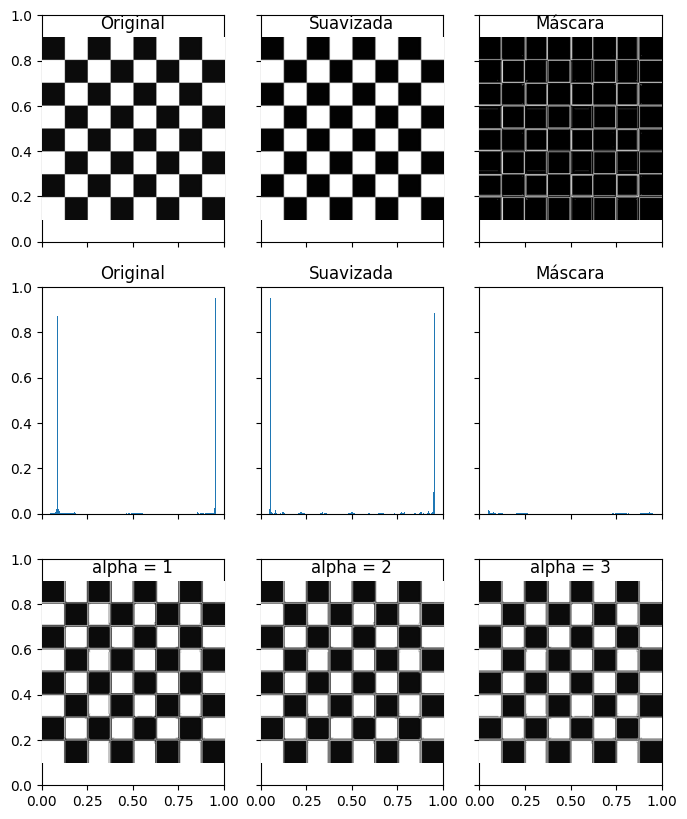

In [ ]:
#Imágenes a usar:
IMAGEN1 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/chessboard.jpg'

#Cargamos la imagen usando CV2
imagen = load_imgURL_CV2(IMAGEN1, flags=-1)
#La convertimos al formato RGB que Matplotlib utiliza
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#Convertimos a gris
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

#Suavizamos la imagen original
suavizada = cv2.GaussianBlur(imagen_gris, (5,5), 0)

#Restamos la suavizada de la original. Esta es nuestra máscara
mascara = imagen_gris - suavizada

alpha = 1
#Adicionamos la original a la máscara multiplicada por un factor
resultado = imagen_gris + (alpha*mascara).astype(np.uint8)
resultado = ajusta_resultado(resultado)

alpha2 = 2
resultado2 = imagen_gris + (alpha2*mascara).astype(np.uint8)
resultado2 = ajusta_resultado(resultado2)

alpha3 = 3
resultado3 = imagen_gris + (alpha3*mascara).astype(np.uint8)
resultado3 = ajusta_resultado(resultado3)

figsize = 8,10
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=figsize, dpi=100, sharex=True, sharey=True)

#Visualizamos las imágenes
# Imagen Original
a=fig.add_subplot(3,3,1)
a.axis('off')
plt.imshow(imagen_gris, cmap='gray')
a.set_title('Original')
# Imagen Suavizada
a=fig.add_subplot(3,3,2)
a.axis('off')
plt.imshow(suavizada, cmap='gray')
a.set_title('Suavizada')
# Máscara
a=fig.add_subplot(3,3,3)
a.axis('off')
plt.imshow(mascara, cmap='gray')
a.set_title('Máscara')


#Visualizamos los histogramas
# Original
a=fig.add_subplot(3,3,4)
a.axis('off')
imgplot = plt.hist(imagen_gris.ravel(),bins=255)
a.set_title('Original')
# Imagen Suavizada
a=fig.add_subplot(3,3,5)
a.axis('off')
imgplot = plt.hist(suavizada.ravel(),bins=255)
a.set_title('Suavizada')
# Máscara
a=fig.add_subplot(3,3,6)
a.axis('off')
imgplot = plt.hist(mascara.ravel(),bins=255)
a.set_title('Máscara')



# Resultados con diferentes alpha:
a=fig.add_subplot(3,3,7)
a.axis('off')
plt.imshow(resultado, cmap='gray')
a.set_title(f"alpha = {alpha}")
# Máscara
a=fig.add_subplot(3,3,8)
a.axis('off')
plt.imshow(resultado2, cmap='gray')
a.set_title(f"alpha = {alpha2}")
# Resultado
a=fig.add_subplot(3,3,9)
a.axis('off')
plt.imshow(resultado3, cmap='gray')
a.set_title(f"alpha = {alpha3}")

## 3. Mejoramiento de imágen médica

**3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes**

La imagen original obtenida de una tomografía cerebral presenta zonas de altas luces y sombras profundas, lo que dificulta la visualización de los detalles finos del tejido cerebral. A continuación, se aplicarán técnicas de procesamiento de imágenes con el objetivo de mejorar la calidad visual y destacar las características importantes para un diagnóstico más efectivo.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Función para cargar una imagen desde una URL
def load_imgURL_CV2(url, flags=cv2.IMREAD_COLOR):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, flags)
    return image

# Cargar la imagen médica desde una URL
imagemed_path = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data32/imagemed.jpg'
imagemed_color = load_imgURL_CV2(imagemed_path)
imagemed_gray = cv2.cvtColor(imagemed_color, cv2.COLOR_BGR2GRAY)

Imagen cargada correctamente, dimensiones: (457, 350)


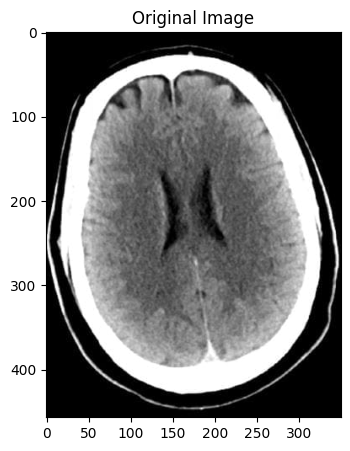

In [ ]:
# Verifica si la imagen se ha cargado correctamente
if imagemed_gray is None:
    print(f"No se pudo cargar la imagen desde la ruta: {imagemed_path}")
else:
    print(f"Imagen cargada correctamente, dimensiones: {imagemed_gray.shape}")
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(imagemed_gray, cmap='gray'), plt.title('Original Image')

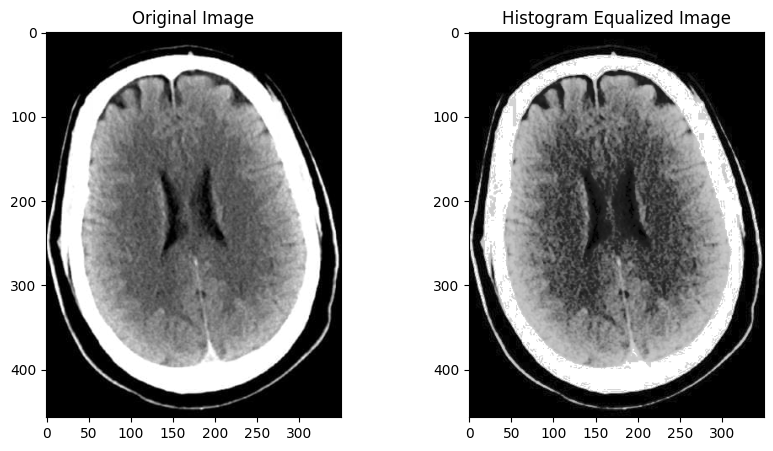

In [ ]:
# Aplicar ecualización de histograma a la imagen en escala de grises
equ_image = cv2.equalizeHist(imagemed_gray)

# Mostrar la imagen original y la imagen con ecualización de histograma
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(imagemed_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equ_image, cmap='gray'), plt.title('Histogram Equalized Image')
plt.show()

La ecualización de histograma se aplicó como primer intento para mejorar el contraste de la imagen, dado que esta técnica es conocida por su capacidad para realzar áreas oscuras y aclarar las zonas iluminadas de una imagen. Sin embargo, como se observa en los resultados, esta técnica ha sobreajustado algunas regiones, perdiendo información valiosa en las zonas de alta y baja intensidad.



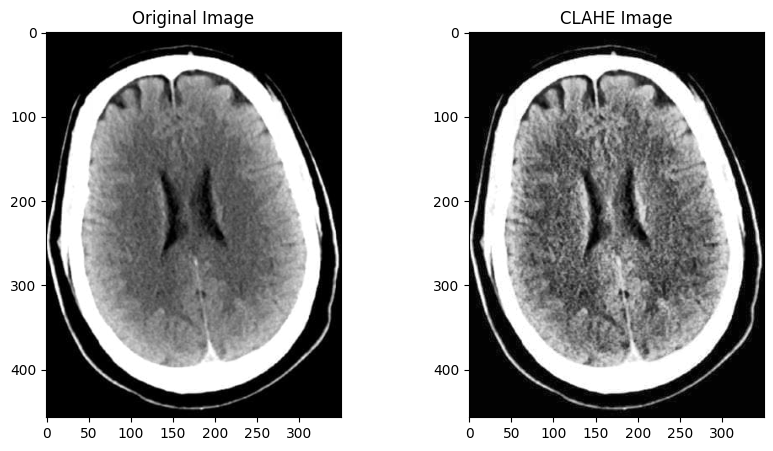

In [ ]:
# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE a la imagen en escala de grises
clahe_image = clahe.apply(imagemed_gray)

# Mostrar la imagen original y la imagen después de CLAHE
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(imagemed_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(clahe_image, cmap='gray'), plt.title('CLAHE Image')
plt.show()

Ante los resultados mixtos de la ecualización de histograma, procedimos a aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization), una técnica de ecualización adaptativa que mejora el contraste localmente y evita la sobreexposición y subexposición excesiva. Ajustando los parámetros de `clipLimit` y `tileGridSize`, logramos una mejora significativa en el balance de contraste, manteniendo la integridad de la información en toda la imagen.

In [ ]:
# Definimos las máscaras de suavizado ponderado
mask_average = np.ones((3, 3), np.float32) / 9
mask_weighted_average = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16

# Aplicamos las máscaras de suavizado ponderado
smoothed_image = cv2.filter2D(clahe_image, -1, mask_average)
weighted_smoothed_image = cv2.filter2D(clahe_image, -1, mask_weighted_average)

Después de obtener una imagen con mejor contraste gracias a CLAHE, aplicamos técnicas de suavizado para reducir el ruido y mejorar la homogeneidad de las regiones de interés. Utilizando máscaras de suavizado promedio y ponderado, preparamos la imagen para un posterior realce de detalles.

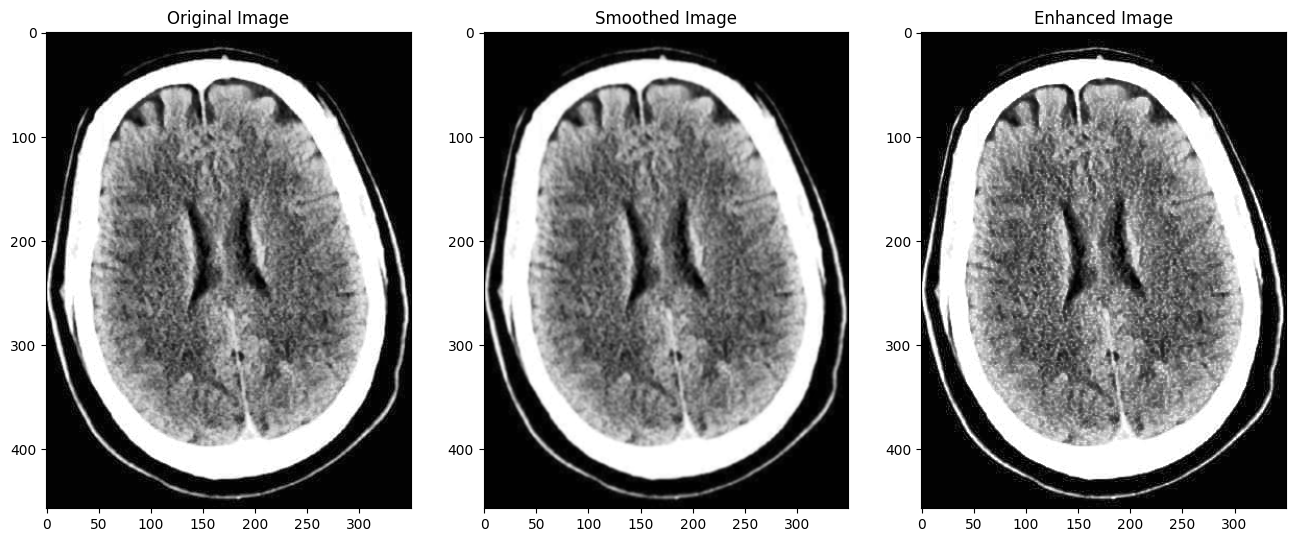

In [ ]:
# Con el fin de realzar la imagen, realizamos la operación 'imagen original' - 'imagen suavizada'
unsharp_mask = cv2.subtract(clahe_image, smoothed_image)

# Aumentamos el contraste de la máscara aplicando un factor alfa
alpha = 1.5  # Este valor puede ser ajustado para obtener el nivel de realce deseado
enhanced_mask = cv2.multiply(unsharp_mask, np.array([alpha]))

# Mejoramos la imagen sumando la máscara ponderada a la imagen original
enhanced_image = cv2.add(clahe_image, enhanced_mask)

# Mostramos las imágenes
plt.figure(figsize=(16, 16))
plt.subplot(131), plt.imshow(clahe_image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(weighted_smoothed_image, cmap='gray'), plt.title('Smoothed Image')
plt.subplot(133), plt.imshow(enhanced_image, cmap='gray'), plt.title('Enhanced Image')
plt.show()


Finalmente, para resaltar aún más las estructuras y bordes dentro de la imagen, empleamos la técnica de 'unsharp masking'. Esta técnica, que involucra la sustracción de una versión suavizada de la imagen a partir de la imagen original y la posterior adición de la máscara resultante, intensificó los bordes y detalles sin incrementar el ruido. La comparación entre la imagen original, suavizada y realzada revela una mejora sustancial, con bordes más definidos y una estructura más discernible, facilitando potencialmente la interpretación y el diagnóstico clínico.

El procesamiento que hemos realizado tiene su aplicación en la mejora del diagnóstico médico. La mejora en el contraste y la claridad de los bordes puede ayudar a los radiólogos a detectar con mayor precisión anomalías como tumores, hemorragias o infartos cerebrales, mientras que estructuras como vasos sanguíneos o áreas de tejido dañado pueden ser más fáciles de identificar.

# **BIBLIOGRAFIA**

Gonzalez, R., y Woods, R. (2018). *Digital Image Processing*. 4th Edition Pearson.

Ochoa, G. (Enero de 2024). *Tema 1.2 Ecualización por histogramas*. Presentación de Power Point, Maestría en Inteligencia Artificial Aplicada, ITESM.

Proyecto OpenCV. (s. f.). *Image Gradients*. https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html. OpenCV Website. (Consultado en Enero 24 de 2024)

Universidad de Sevilla. (s.f.). Tema 5: Segmentación - US. https://www.asignatura.us.es/imagendigital/Tema5-1_SegmentacionDiscontinuidades.pdf

Martínez, J. (2022, junio 30). Lo Que necesitas saber sobre la detección de Bordes. DataSmarts. https://www.datasmarts.net/lo-que-necesitas-saber-sobre-la-deteccion-de-bordes/

Tsankashvili, N. (2020, September 22). Comparing edge detection methods. Medium. https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e

.

.  

.   

.    

.    

.

.

.

.
.eod.
